In [91]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Data generation

In [68]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])

dataset5= pd.read_csv("dataset5.csv")
dataset6= pd.read_csv("dataset6.csv")
dataset7= pd.read_csv("dataset7.csv")
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")
datasets=[dataset1]
z = StandardScaler()
dataset6[["x","y"]] = z.fit_transform(dataset6)
#ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 
import warnings
warnings.filterwarnings('ignore')

In [284]:
def clustering(dataset):
    dataset = z.fit_transform(dataset)
    df = pd.DataFrame(dataset)
    X=df.values
    #sns.scatterplot(df[0],df[1])
    
    fig_dims = (30, 10)
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4,figsize=fig_dims)
    plt.figure(figsize=(30,30))

    ax1.scatter(df[0],df[1])
    ax1.set_title('Original Dataset')
    #plt.show()
    
    kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
    y_kmeans = kmeans.fit_predict(X)
    #ax2.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
    #ax2.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
    #ax2.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
    #ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
    ax2.scatter(X[:,0], X[:,1],c=y_kmeans, cmap='Paired')
    ax2.set_title('Kmeans')
    #plt.show()
    
    hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
    y_hc=hc.fit_predict(X)
    #ax3.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
    #ax3.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
    #ax3.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
    ax3.scatter(X[:,0], X[:,1],c=y_hc, cmap='Paired')
    ax3.set_title('Agglomerative Clustering')
    #plt.show()

    db = DBSCAN(eps=0.31, min_samples=11)
    y = db.fit_predict(X)
    #ax4.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
    #ax4.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
    #ax4.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')
    #ax4.scatter(X[y==3, 0], X[y==3, 1], s=100, c='c', label ='Cluster 4')
    #ax4.scatter(X[y==4, 0], X[y==4, 1], s=100, c='m', label ='Cluster 5')
    ax4.scatter(X[:,0], X[:,1],c=y, cmap='Paired')
    ax4.set_title('DBSCAN')
    #plt.show()


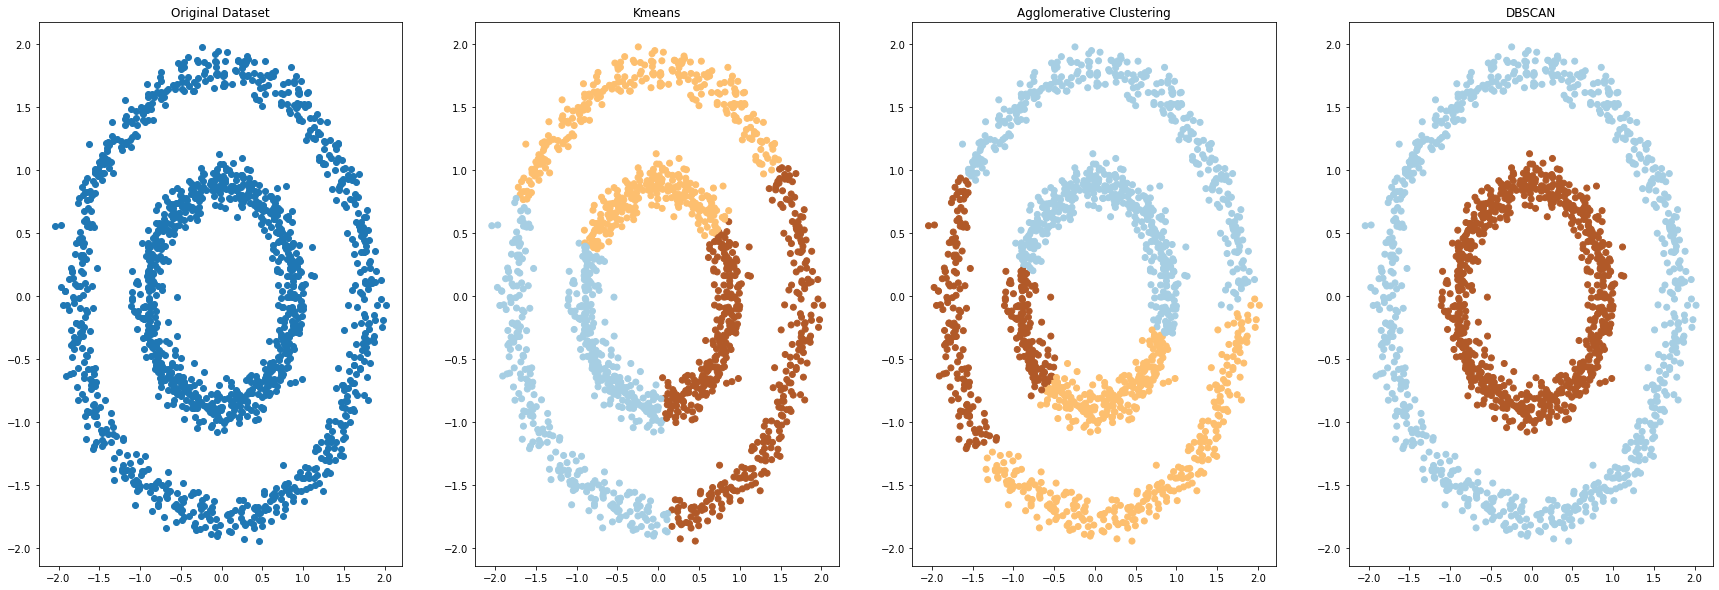

<Figure size 2160x2160 with 0 Axes>

In [231]:
clustering(dataset1)

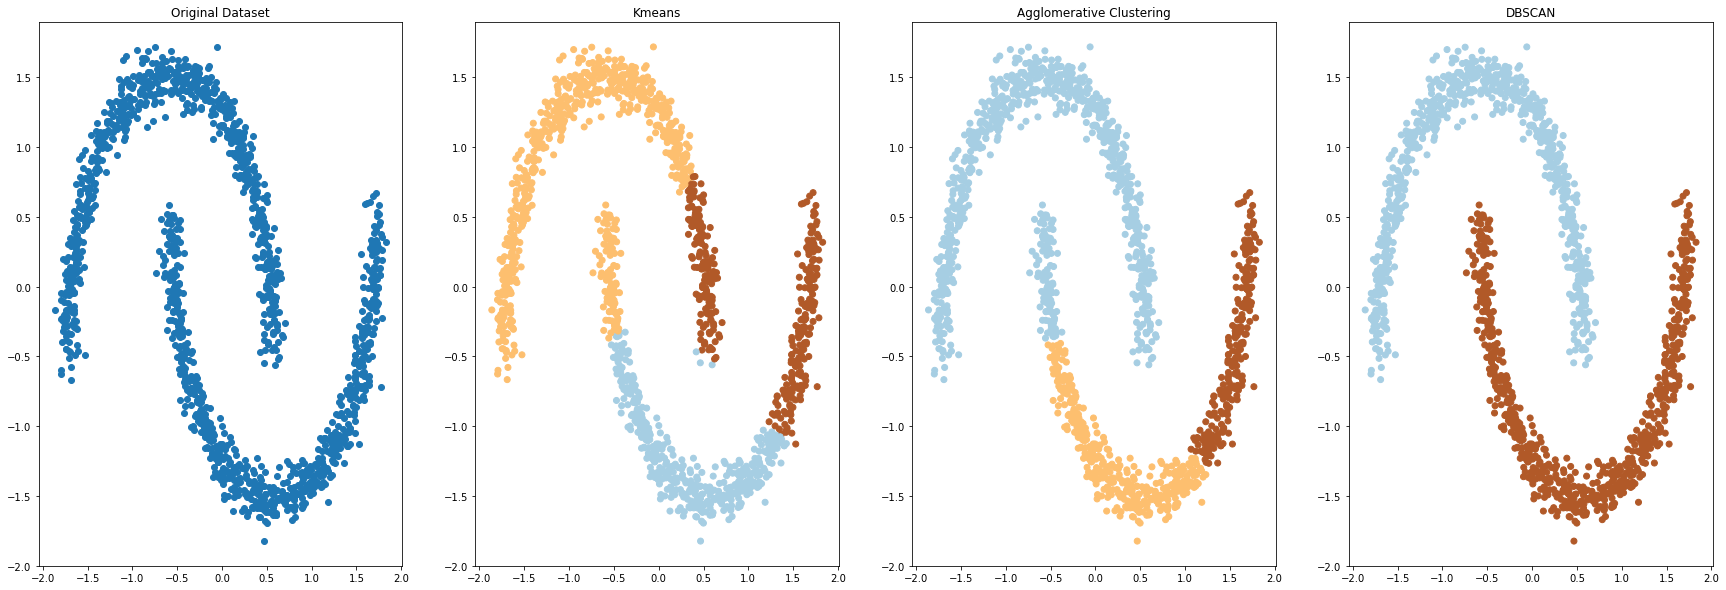

<Figure size 2160x2160 with 0 Axes>

In [232]:
clustering(dataset2)

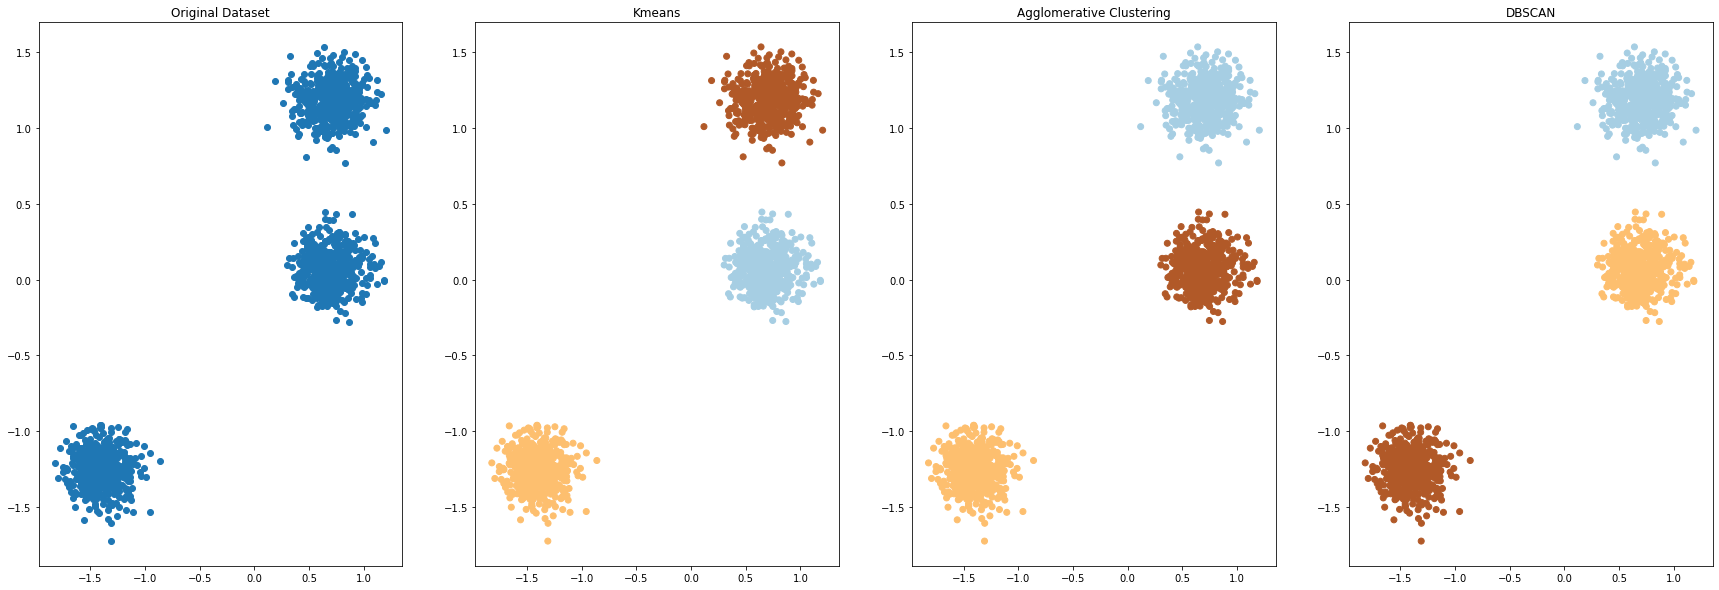

<Figure size 2160x2160 with 0 Axes>

In [233]:
clustering(dataset3)

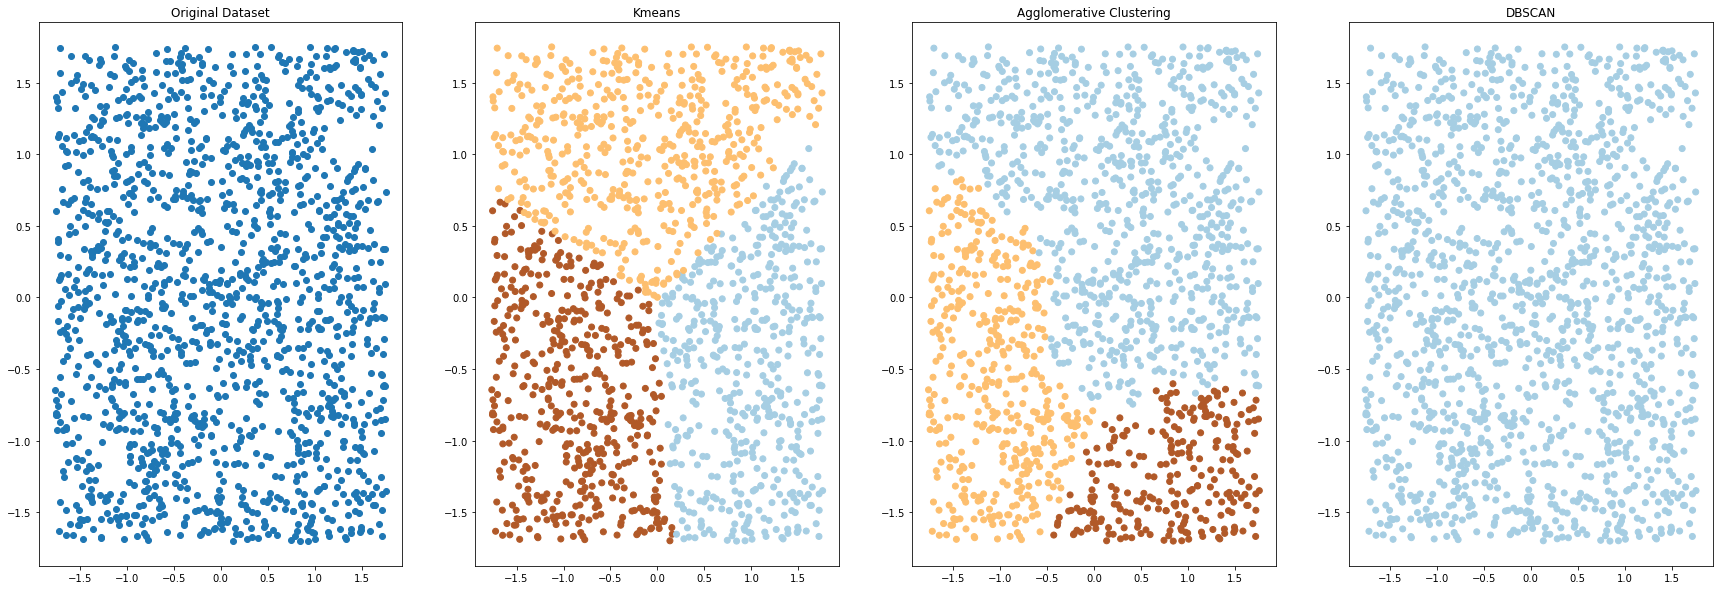

<Figure size 2160x2160 with 0 Axes>

In [234]:
clustering(dataset4)

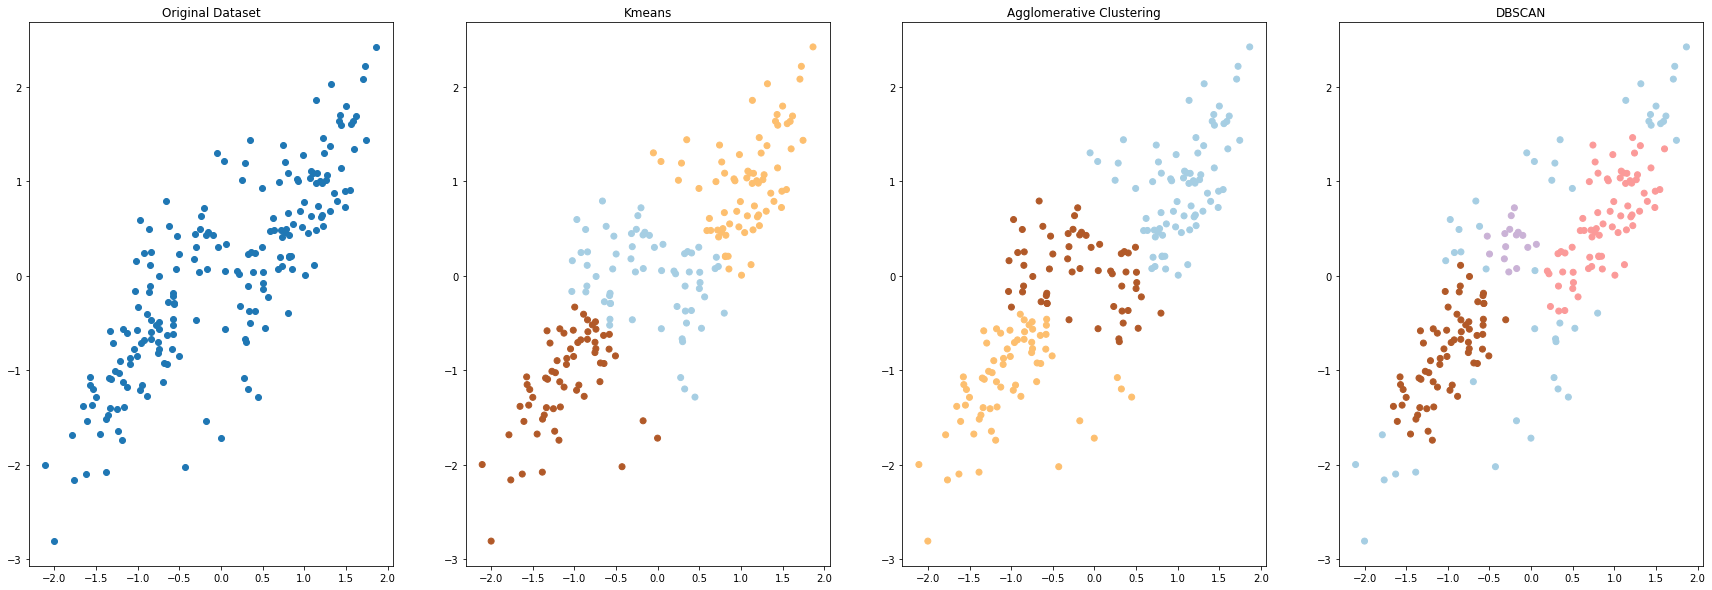

<Figure size 2160x2160 with 0 Axes>

In [285]:
clustering(dataset5) #eps=0.31, min_samples=11

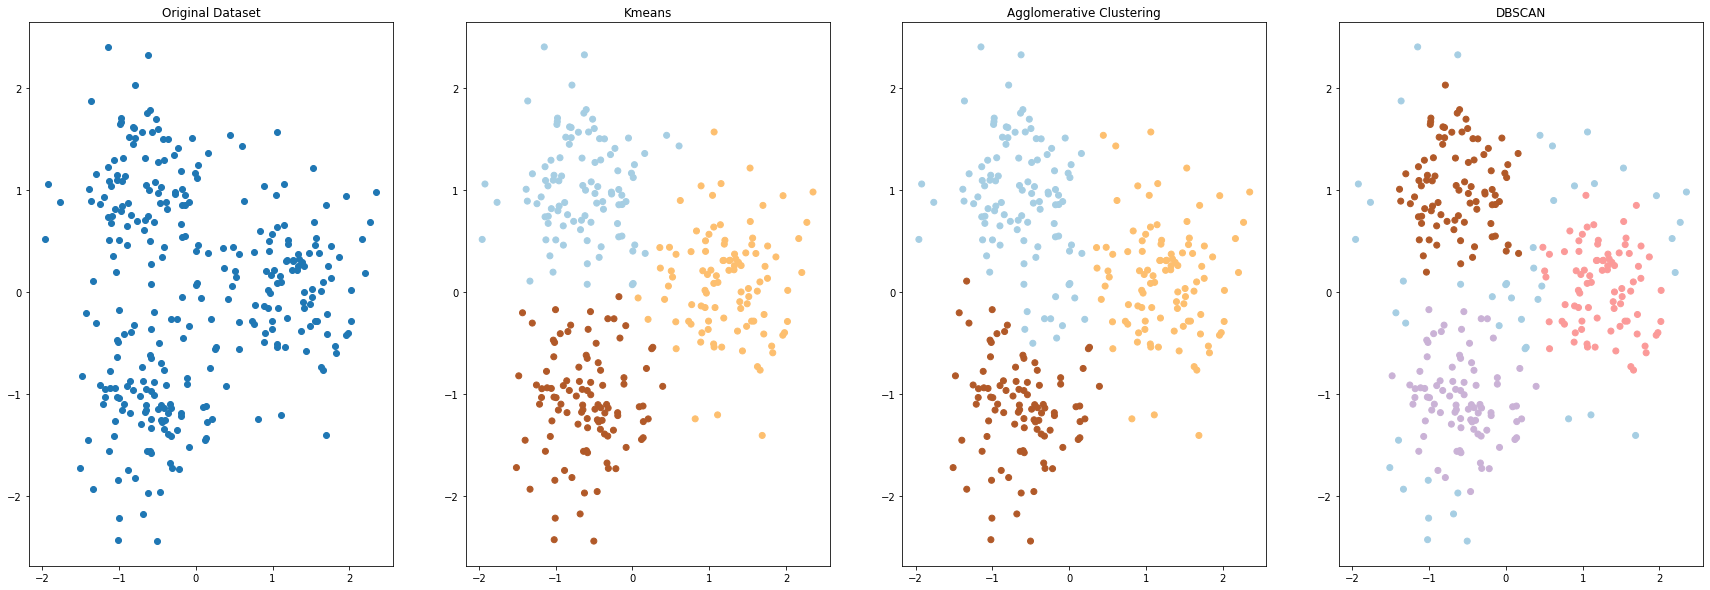

<Figure size 2160x2160 with 0 Axes>

In [244]:
clustering(dataset6)#eps=0.3 min_samples= 10

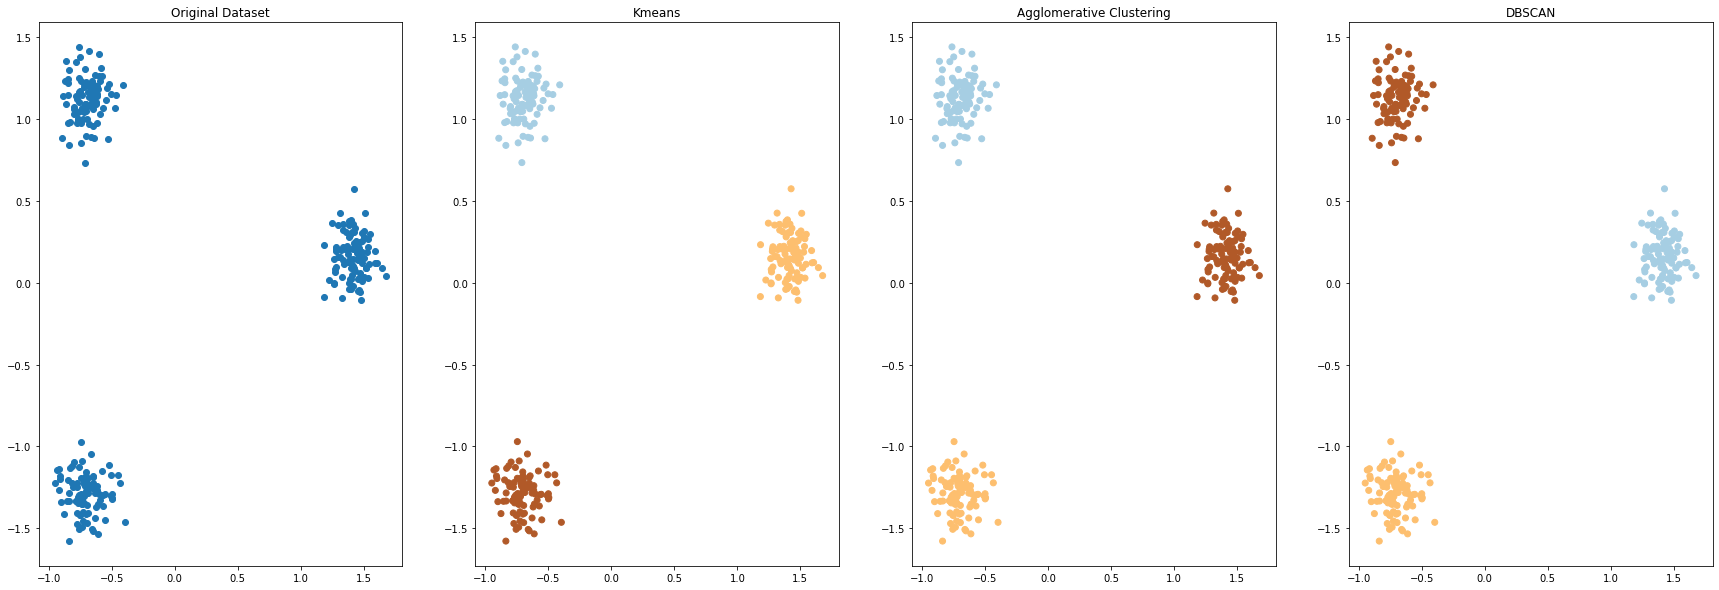

<Figure size 2160x2160 with 0 Axes>

In [237]:
clustering(dataset7) #eps=0.3 min_samples= 10

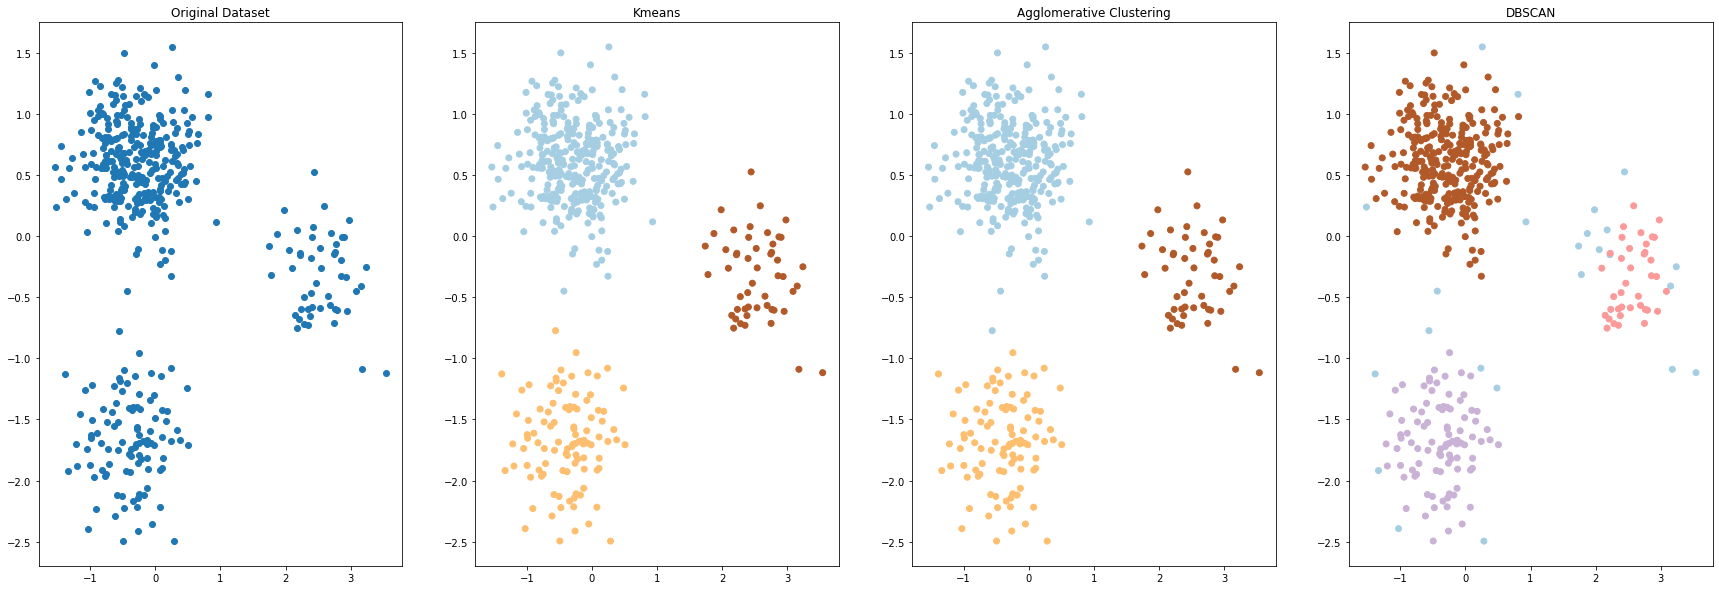

<Figure size 2160x2160 with 0 Axes>

In [275]:
clustering(dataset8) # eps=0.3 min_samples= 10

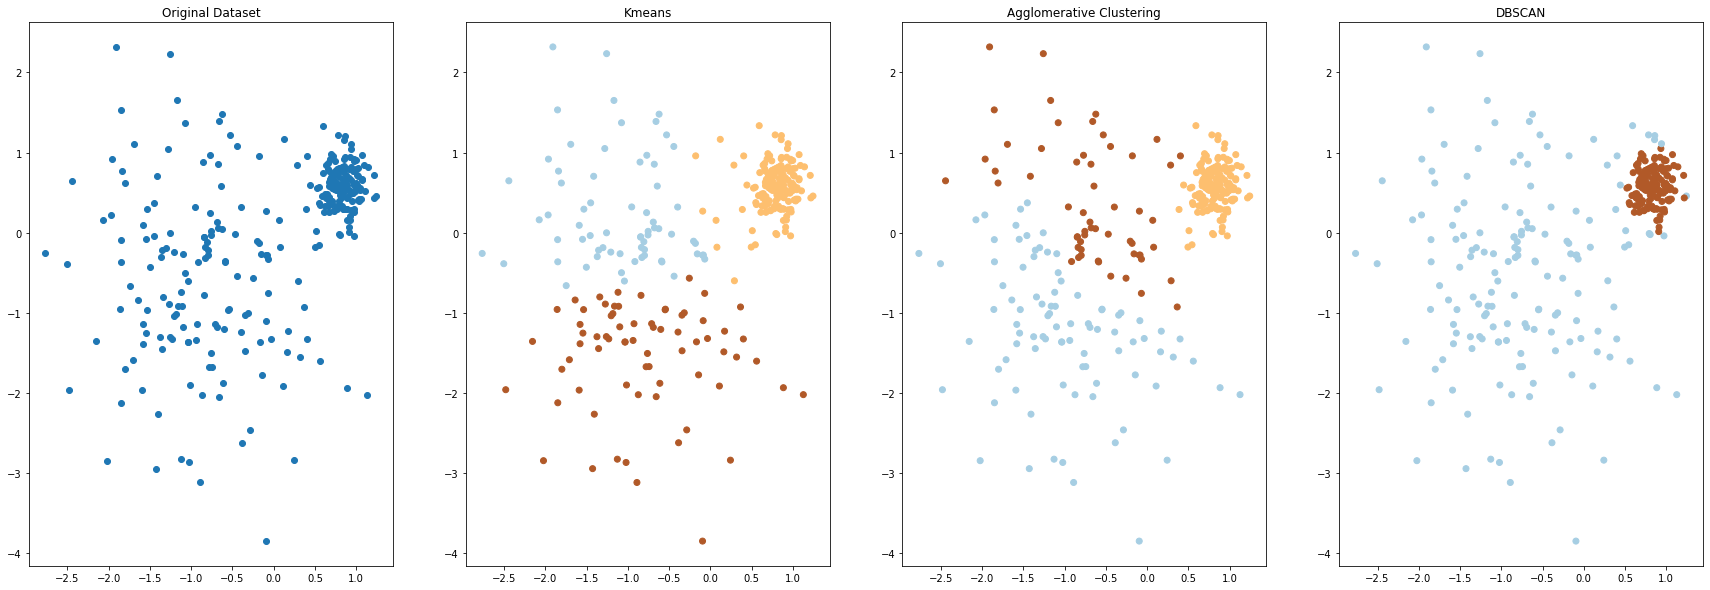

<Figure size 2160x2160 with 0 Axes>

In [272]:
clustering(dataset9) # eps=0.15 min_samples=10

1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

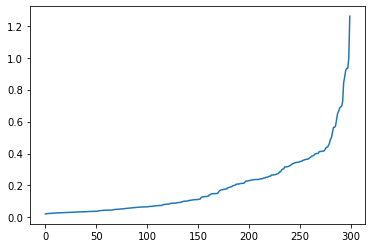

In [176]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)
